<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/main/%E5%AE%8C%E6%88%90%E8%BB%8A%E7%89%8C%E6%88%AA%E5%9C%96(v5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import numpy

os.mkdir("/content/plate_train_data")
os.mkdir("/content/plate_train_data/images")
os.mkdir("/content/plate_train_data/labels")
os.mkdir("/content/plate_train_data/images/train")
os.mkdir("/content/plate_train_data/images/val")
os.mkdir("/content/plate_train_data/labels/train")
os.mkdir("/content/plate_train_data/labels/val")

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse

path = "/content/drive/MyDrive/AI/dataset/CarLicensePlateDetection/annotations"
classes = {"licence":0}

for annotations in os.listdir(path):
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))
    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("/content/plate_train_data/labels/train/"+filename,"w") as r:
        for items in root.getElementsByTagName("object") :
            name = items.getElementsByTagName("name")[0].childNodes[0].data
            xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
            ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
            xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
            ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            r.write(str(classes[name])+" ")
            r.write(str(x_center_norm)+" ")
            r.write(str(y_center_norm)+" ")
            r.write(str(width_norm)+" ")
            r.write(str(height_norm)+"\n")

In [ ]:
import shutil
path = "/content/drive/MyDrive/AI/dataset/CarLicensePlateDetection/images"

for images in os.listdir(path):
  image_path = os.path.join(path,images)
  shutil.copy(image_path,"/content/plate_train_data/images/train/"+images)

In [ ]:
from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("/content/plate_train_data/images/train/*.png")
shuffle(files)
txt_train_path = "/content/plate_train_data/labels/train/"
img_train_path = "/content/plate_train_data/images/train/"
txt_val_path = "/content/plate_train_data/labels/val/"
img_val_path = "/content/plate_train_data/images/val/"
for i in files[:120]:
    filename = i.split("/")[-1]
    shutil.move(txt_train_path+filename.replace(".png",".txt"),\
                txt_val_path+filename.replace(".png",".txt"))
    shutil.move(img_train_path+filename,img_val_path+filename)

In [ ]:
%cd /content

/content


In [ ]:
!echo "train: /content/plate_train_data/images/train" > licence.yaml
!echo "val:   /content/plate_train_data/images/val"  >> licence.yaml
!echo "nc : 1" >> licence.yaml
!echo "names: ['licence']" >> licence.yaml

In [ ]:
%cd /content/
%rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 50), reused 52 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.12 MiB | 20.05 MiB/s, done.
Resolving deltas: 100% (11312/11312), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 731.7/731.7 MB 121.8 MB/s eta 0:00:01

In [ ]:
!python train.py --weights yolov5s.pt --cfg models/yolov5s.yaml --img 416 --batch 48 --epochs 40 --data /content/licence.yaml  --cache

2024-03-12 03:12:56.169756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 03:12:56.169825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 03:12:56.171801: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/licence.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=48, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=

In [ ]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt --conf 0.25 --img-size 640 --source /content/drive/MyDrive/車牌/21061.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/車牌/21061.jpg, data=drive/MyDrive/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/車牌/21061.jpg: 384x640 2 licences, 477.8ms
Speed: 3.6ms pre-process, 477.8ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to drive/MyDrive/yolov5/runs/detect/exp6


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-26 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


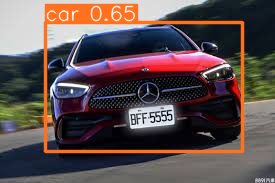

座標： (45, 22, 242, 151)


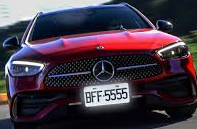

In [ ]:
#成功(用這個可以利用yolov5本身偵測出車子，然後計算出車子座標並擷取)

import cv2
from google.colab.patches import cv2_imshow
import torch
from PIL import Image

# 載入YOLOv5模型
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# 讀取原始圖像
original_image = cv2.imread("/content/drive/MyDrive/車牌/car888.jpg")

# 將原始圖像轉換為PIL格式
image_pil = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

# 進行目標檢測
results = model(image_pil)

# 車牌檢測結果
results.show()

# 取得車牌框的座標
plate_boxes = []
for detection in results.xyxy[0]:
    if detection[5] == 2:  # 假設類別2代表車牌
        x1, y1, x2, y2 = detection[:4].int().tolist()
        plate_boxes.append((x1, y1, x2, y2))

# 車牌座標
plate_boxes = []
for detection in results.xyxy[0]:
    if detection[5] == 2:  # 假設類別2代表車牌
        x1, y1, x2, y2 = detection[:4].int().tolist()
        plate_boxes.append((x1, y1, x2, y2))

if plate_boxes:
    for box in plate_boxes:
        print("座標：", box)
else:
    print("未檢測到車牌框")

# 擷取車牌位置的部分
if plate_boxes:
    x1, y1, x2, y2 = plate_boxes[0]  # 假設只有一個車牌框
    plate_region = original_image[y1:y2, x1:x2]

    # 顯示擷取的車牌位置的部分
    cv2_imshow(plate_region)
else:
    print("未偵測到車牌框")

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import torch
from PIL import Image

# 加載模型
model = torch.hub.load('ultralytics/yolov5', 'custom', path="/content/drive/MyDrive/v5車牌/yolov5/runs/train/exp/weights/best.pt")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 71.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.5s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-4-2 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


WARNING ⚠️ NMS time limit 0.550s exceeded


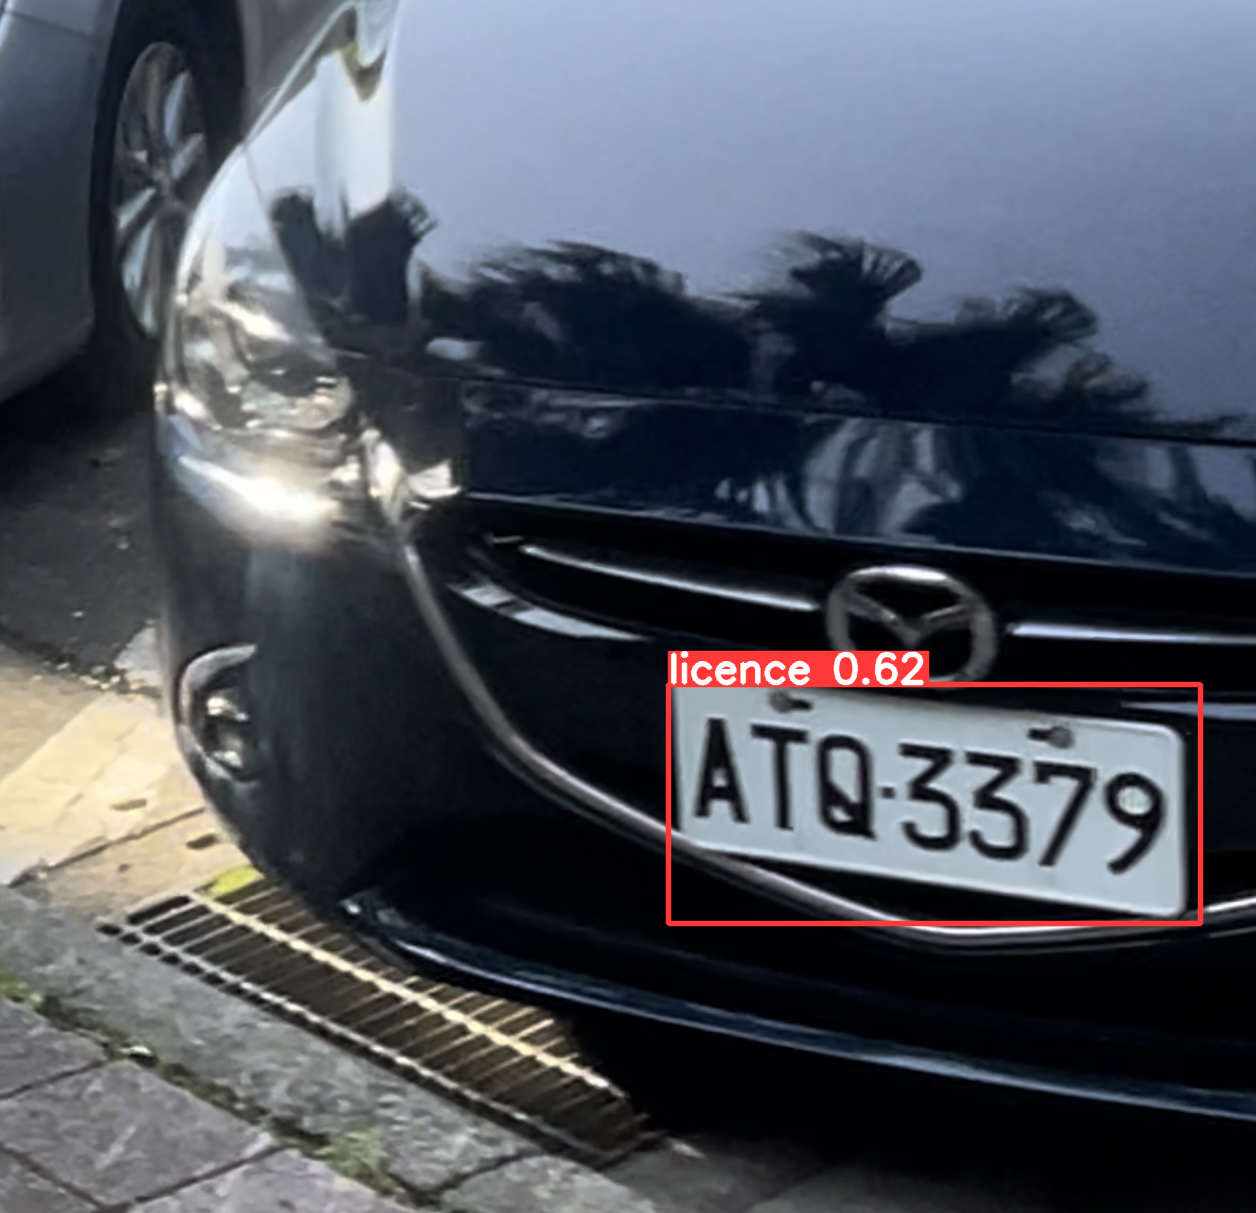

In [ ]:
# 讀取照片
original_image = cv2.imread("/content/drive/MyDrive/車牌/plates/IMG_6206.jpg")

# 将照片傳換PIL格式
image_pil = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

# 執行權重
results = model(image_pil)

# 車牌檢測結果
results.show()

In [ ]:
# 車牌座標
plate_boxes = []
for detection in results.xyxy[0]:
    if detection[5] == 0:
        x1, y1, x2, y2 = detection[:4].int().tolist()
        plate_boxes.append((x1, y1, x2, y2))
print(results.xyxy[0])

if plate_boxes:
    for box in plate_boxes:
        print("座標：", box)
else:
    print("未檢測到車牌框")

tensor([[6.68009e+02, 6.84778e+02, 1.20100e+03, 9.23117e+02, 6.16805e-01, 0.00000e+00]], device='cuda:0')
座標： (668, 684, 1200, 923)


車牌數量： 1


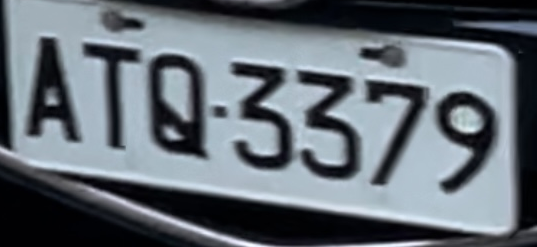

In [ ]:
# 車牌數量
num_plates = len(plate_boxes)

# 輸出數量
print("車牌數量：", num_plates)

# 截圖車牌
if num_plates > 0:
    for i in range(num_plates):
        x1, y1, x2, y2 = plate_boxes[i]
        plate_region = original_image[y1-3:y2+5, x1:x2+5]

        # 擷取照片
        cv2_imshow(plate_region)

        # 儲存
        cv2.imwrite(f"/content/drive/MyDrive/車牌/plate_region_{i+1}.jpg", plate_region)
else:
    print("未檢測到車牌框")
